In [57]:
ls ../../3_regular

12_graphs/  16_graphs/  20_graphs/  24_graphs/  4_graphs/  8_graphs/


In [58]:
import os
from classical_optimization.terra.utils import read_graph
path = '../../3_regular'
all_data = {}
qubit_numbers = []
for folder in os.listdir(path):
    num_qubits = int(folder.split('_')[0])
    qubit_numbers.append(num_qubits)
    for graph_file in os.listdir(os.path.join(path, folder)):
        graph_data = read_graph(os.path.join(path, folder, graph_file))
        extant_data = all_data.get(num_qubits, [])
        extant_data.append(graph_data)
        # Probably don't need this, since it's the same list...
        all_data[num_qubits] = extant_data

In [59]:
graph_data

{'graph': <networkx.classes.graph.Graph at 0x7f5bf8ac8a90>,
 'landscape_d40_b0.7853981633974483_g3.141592653589793_b-0.7853981633974483_g-3.141592653589793': array([[ 5.55111512e-17,  1.89369871e-02,  7.52698024e-02, ...,
          7.52698024e-02,  1.89369871e-02,  5.55111512e-17],
        [-5.37764278e-17, -1.93895086e-02, -1.20308541e-03, ...,
         -1.20308541e-03, -1.93895086e-02, -2.20309881e-16],
        [ 1.04083409e-16, -5.69685971e-02, -7.66700898e-02, ...,
         -7.66700898e-02, -5.69685971e-02, -2.49800181e-16],
        ...,
        [-6.93889390e-18,  9.38680066e-02,  2.23336043e-01, ...,
          2.23336043e-01,  9.38680066e-02,  2.08166817e-16],
        [-5.37764278e-17,  5.70182537e-02,  1.50767966e-01, ...,
          1.50767966e-01,  5.70182537e-02,  1.14491749e-16],
        [ 5.55111512e-17,  1.89369871e-02,  7.52698024e-02, ...,
          7.52698024e-02,  1.89369871e-02,  5.55111512e-17]]),
 'landscape_d40_b0.7853981633974483_g3.141592653589793_b-0.7853981633974

In [60]:
qubit_numbers = [4]

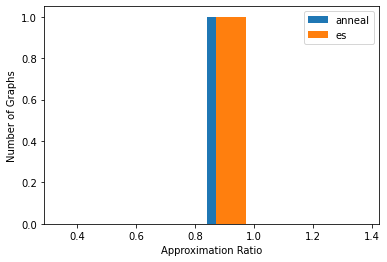

In [61]:
import matplotlib.pyplot as plt
import numpy as np
for num_qubits in qubit_numbers:
    anneal_ratios = []
    es_ratios = []
    for graph_data in all_data[num_qubits]:
        if graph_data.get('annealing_result') is not None:
            annealing_approx_ratio = graph_data.get('annealing_result')[1]/graph_data.get('maxarg_result')[1]
            es_approx_ratio = graph_data.get('es_result')[1]/graph_data.get('maxarg_result')[1]
            anneal_ratios.append(annealing_approx_ratio)
            es_ratios.append(es_approx_ratio)
    if len(anneal_ratios) > 0:
        plt.hist(anneal_ratios, label='anneal')
        plt.hist(es_ratios, label='es')
        plt.xlabel('Approximation Ratio')
        plt.ylabel('Number of Graphs')
        plt.legend()
    plt.show()

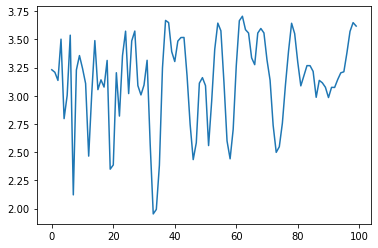

In [62]:
plt.plot([result[1] for result in graph_data['es_result'][-1]])

In [63]:
np.array([result[0] for result in graph_data['es_result'][-1]]) * np.pi

array([[ 1.07423368e-02,  2.89499176e-03],
       [-1.51996450e+00,  1.57934117e+00],
       [-8.06585007e-01,  2.83052230e+00],
       [ 2.03276076e-01,  4.20668070e+00],
       [ 6.22037850e-01,  5.03279334e+00],
       [ 1.29833063e+00,  5.66047972e+00],
       [ 2.14997346e+00,  6.48488787e+00],
       [ 2.70592546e+00,  6.98984398e+00],
       [ 3.25078822e+00,  7.18109463e+00],
       [ 3.54852885e+00,  7.42848800e+00],
       [ 3.75605036e+00,  7.83539303e+00],
       [ 3.92177382e+00,  8.22133412e+00],
       [ 4.11686755e+00,  8.48613949e+00],
       [ 4.16150988e+00,  8.90472933e+00],
       [ 4.04388515e+00,  9.25351874e+00],
       [ 3.97780693e+00,  9.75180145e+00],
       [ 3.86201479e+00,  1.01038442e+01],
       [ 3.75115208e+00,  1.05314611e+01],
       [ 3.72172296e+00,  1.09092755e+01],
       [ 3.64356611e+00,  1.12428524e+01],
       [ 3.70869664e+00,  1.14380763e+01],
       [ 3.87205443e+00,  1.16492758e+01],
       [ 4.04450816e+00,  1.19219461e+01],
       [ 4.

In [64]:
graph_data['maxarg_result']

(2701, 4.15179249812048)

# Time to figure out how to plot landscapes...

In [65]:
def plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints=None):
    ax = plt.imshow(landscape)
    if scatterpoints is None:
        scatterpoints = []
    for scatterpoint in scatterpoints:
        plt.scatter(scatterpoint[0][1], scatterpoint[0][0], c=scatterpoint[1], s=100, marker='*')
    ax.figure.canvas.draw()

    subplot = ax.figure.get_axes()[0]

    ticks = subplot.get_xticklabels()
    scale = 1/max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_gamma - min_gamma
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(round(scale * float(tick.get_text().replace('−', '-')) - max_gamma, 2))
        subplot.set_xticklabels(ticks)

    ticks = subplot.get_yticklabels()
    scale = 1 / max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_beta - min_beta
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(-1 * round(scale * float(tick.get_text().replace('−', '-')) - max_beta, 2))
        subplot.set_yticklabels(ticks)

    plt.ylabel(r"$\beta$")
    plt.xlabel(r"$\gamma$")

In [66]:
graph_data.get('es_result')[0]

array([ 3.36029676, 13.85731346])

NUMQUBITS: 4
13.857313462095114 3.3602967642078934


<ipython-input-65-975018fa7025>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(ticks)
<ipython-input-65-975018fa7025>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_yticklabels(ticks)


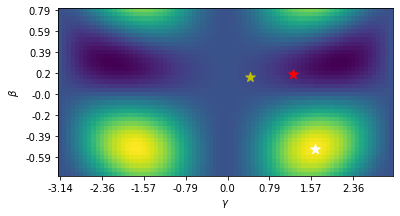

In [75]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for num_qubits in qubit_numbers:
    print(f"NUMQUBITS: {num_qubits}")
    for graph_data in all_data[num_qubits]:
        landscape = None
        for k in graph_data.keys():
            if 'landscape' in k and 'time' not in k:
                _, disc, max_beta, max_gamma, min_beta, min_gamma = k.split('_')
                disc = int(disc[1:])
                max_beta = float(max_beta[1:])
                min_beta = float(min_beta[1:])
                max_gamma = float(max_gamma[1:])
                min_gamma = float(min_gamma[1:])
                landscape = graph_data[k]
        if landscape is not None:
            ind = np.argmax(landscape)
            ind = np.unravel_index(ind,landscape.shape)
            scatterpoints = [(ind, 'w')]
            skip = False
            for result, color in [('annealing_result', 'y'), ('es_result', 'r')]:
                if graph_data.get(result) is not None:
                    beta, gamma = graph_data.get(result)[0]
                    y, x = ((beta - min_beta) % (max_beta-min_beta)) * (disc - 1) / (max_beta-min_beta), ((gamma - min_gamma) % (max_gamma - min_gamma)) * (2*disc-1)/(max_gamma-min_gamma)
                    scatterpoints.append(((disc - y, x), color))
                else:
                    skip = True
            if skip:
                continue
            plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints)  
            print(gamma, beta)
            plt.show()

In [85]:
np.max(landscape)

4.15179249812048

In [83]:
graph_data['graph'].get_edge_data(0,2)

{'weight': 1}